# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# import math
# import random
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter, OrderedDict

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in true_divide|invalid value encountered in true_divide")
# pd.set_option('display.max_columns', None)
# %matplotlib inline

# # sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score

# # Ensemble
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# # Optimisations
# from skopt import BayesSearchCV
# from deap import base, creator, tools, algorithms

# Import Data

In [3]:
# Data Import
best_params = pd.read_csv('best_params.csv')
best_params

,Method,bergamo,roma,milano,sicilia,trentino,puglia,firenze,venezia,napoli,bologna
0,rf,"RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random..."
1,gb,"GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra..."
2,lgb,"LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)"
3,xgb,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."
4,stack,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."
5,bayes,"OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('..."
6,GA,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."


## 7 Methods

In [2]:
# Data Import
output_eval = pd.read_csv('output_measurement.csv')
output_eval

,Unnamed: 0,adj_R,rmse,mae,accuracy
0,bergamo_rf,0.58,5.27,0.19,80.98
1,bergamo_gb,0.55,5.46,0.20,80.12
2,bergamo_lgb,0.57,5.37,0.19,80.57
3,bergamo_xgb,0.53,5.59,0.20,80.29
4,bergamo_stack,1.00,0.16,0.01,99.41
...,...,...,...,...,...
65,bologna_lgb,0.52,5.40,0.17,82.76
66,bologna_xgb,0.46,5.72,0.18,81.96
67,bologna_stack,1.00,0.34,0.01,98.84
68,bologna_bayes,0.92,2.27,0.08,91.73


## 4 methods of Single Ensenble Models

In [24]:
# Single Ensenble Models
indices_to_extract = []
for x in range(len(output_eval)):
    if (x - 0) % 7 == 0 or (x - 1) % 7 == 0 or (x - 2) % 7 == 0 or (x - 3) % 7 == 0:
        indices_to_extract.append(x)

singles = output_eval.iloc[indices_to_extract]
# singles

## 3 Methods of Advanced Models

In [25]:
# Main advaned HPO models
indices_to_extract = []
for x in range(len(output_eval)):
    if (x - 4) % 7 == 0 or (x - 5) % 7 == 0 or (x - 6) % 7 == 0:
        indices_to_extract.append(x)

only_mains = output_eval.iloc[indices_to_extract]
# only_mains 

# Evaluation Metrics by Methods

## RF

In [6]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# indexes = [index for index in indices]
# indexes

In [315]:
indexes = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_rf,0.580,5.270,0.190,80.980
1,roma_rf,0.620,4.900,0.170,83.060
2,milano_rf,0.590,5.320,0.180,81.740
3,sicilia_rf,0.630,5.540,0.210,79.230
4,trentino_rf,0.650,5.240,0.170,83.050
5,puglia_rf,0.600,5.550,0.190,80.700
6,firenze_rf,0.690,5.010,0.170,83.160
7,venezia_rf,0.630,4.940,0.150,85.130
8,napoli_rf,0.500,5.610,0.200,80.030
9,bologna_rf,0.500,5.510,0.180,82.300


## GB

In [7]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 1 for index in indices]

In [317]:
indexes = [1, 8, 15, 22, 29, 36, 43, 50, 57, 64]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_gb,0.550,5.460,0.200,80.120
1,roma_gb,0.550,5.340,0.190,81.480
2,milano_gb,0.560,5.520,0.190,80.830
3,sicilia_gb,0.560,5.990,0.230,77.290
4,trentino_gb,0.600,5.640,0.190,81.110
5,puglia_gb,0.530,6.030,0.210,78.580
6,firenze_gb,0.650,5.340,0.190,81.490
7,venezia_gb,0.600,5.150,0.160,83.990
8,napoli_gb,0.490,5.710,0.200,79.630
9,bologna_gb,0.480,5.590,0.180,81.570


## LightGBM

In [8]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 2 for index in indices]

In [318]:
indexes = [2, 9, 16, 23, 30, 37, 44, 51, 58, 65]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_lgb,0.570,5.370,0.190,80.570
1,roma_lgb,0.620,4.950,0.170,82.900
2,milano_lgb,0.620,5.170,0.180,82.170
3,sicilia_lgb,0.630,5.540,0.210,79.430
4,trentino_lgb,0.650,5.260,0.170,82.920
5,puglia_lgb,0.600,5.570,0.190,80.530
6,firenze_lgb,0.690,4.980,0.170,83.070
7,venezia_lgb,0.650,4.800,0.150,85.490
8,napoli_lgb,0.530,5.470,0.190,80.700
9,bologna_lgb,0.520,5.400,0.170,82.760


## XGBM

In [9]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 3 for index in indices]

In [319]:
indexes = [3, 10, 17, 24, 31, 38, 45, 52, 59, 66]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_xgb,0.530,5.590,0.20,80.29
1,roma_xgb,0.600,5.030,0.17,82.94
2,milano_xgb,0.600,5.290,0.18,81.80
3,sicilia_xgb,0.630,5.490,0.20,79.75
4,trentino_xgb,0.630,5.390,0.18,82.40
5,puglia_xgb,0.610,5.520,0.19,80.78
6,firenze_xgb,0.670,5.150,0.17,82.55
7,venezia_xgb,0.650,4.810,0.14,85.85
8,napoli_xgb,0.500,5.620,0.19,80.78
9,bologna_xgb,0.460,5.720,0.18,81.96


## Stacking Ensemble

In [10]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 4 for index in indices]

In [320]:
indexes = [4, 11, 18, 25, 32, 39, 46, 53, 60, 67]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_stack,1.000,0.160,0.010,99.410
1,roma_stack,0.900,2.480,0.080,91.580
2,milano_stack,0.930,2.190,0.080,92.250
3,sicilia_stack,0.840,3.650,0.140,86.220
4,trentino_stack,0.990,0.870,0.030,97.200
5,puglia_stack,0.860,3.330,0.120,88.170
6,firenze_stack,0.970,1.440,0.050,95.200
7,venezia_stack,0.980,1.010,0.030,96.980
8,napoli_stack,0.980,1.000,0.040,96.440
9,bologna_stack,1.000,0.340,0.010,98.840


## Bayesian

In [11]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 5 for index in indices]

In [322]:
indexes = [5, 12, 19, 26, 33, 40, 47, 54, 61, 68]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_bayes,0.940,2.09,0.080,91.770
1,roma_bayes,0.750,3.97,0.140,86.180
2,milano_bayes,0.770,3.98,0.140,85.740
3,sicilia_bayes,0.710,4.88,0.180,81.800
4,trentino_bayes,0.890,2.97,0.100,89.730
5,puglia_bayes,0.710,4.74,0.170,83.350
6,firenze_bayes,0.860,3.36,0.120,88.340
7,venezia_bayes,0.870,3.00,0.090,90.660
8,napoli_bayes,0.830,3.34,0.120,87.790
9,bologna_bayes,0.920,2.27,0.080,91.730


## Genetic Algorithm

In [12]:
# # calculator
# indices = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
# [index + 6 for index in indices]

In [323]:
indexes = [6, 13, 20, 27, 34, 41, 48, 55, 62, 69]
selected_rows = output_eval.loc[indexes]

# assign mean values in a new row
mean_row = selected_rows.mean()
mean_row['Unnamed: 0'] = 'Mean'  

# DataFrame 
output_eval.loc[indexes].append(mean_row, ignore_index=True).rename(columns={'Unnamed: 0': 'City'})

,City,adj_R,rmse,mae,accuracy
0,bergamo_GA,0.940,2.050,0.070,92.910
1,roma_GA,0.790,3.670,0.120,87.540
2,milano_GA,0.830,3.470,0.120,88.230
3,sicilia_GA,0.770,4.390,0.160,83.790
4,trentino_GA,0.950,2.020,0.060,93.760
5,puglia_GA,0.740,4.470,0.150,84.540
6,firenze_GA,0.890,2.960,0.100,90.120
7,venezia_GA,0.910,2.390,0.070,93.030
8,napoli_GA,0.910,2.340,0.080,91.710
9,bologna_GA,0.920,2.280,0.080,92.080


# Visualisation By cities

## Create a function

In [29]:
def create_subplot(subset, x_labels, colors, city_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    for col_idx, col_name in enumerate(subset.columns):
        row = col_idx // 2
        col = col_idx % 2

        subset_col = subset[col_name]
        axes[row, col].bar(range(len(subset_col)), subset_col, color=colors[col_idx], label=col_name)
        axes[row, col].plot(range(len(subset_col)), subset_col, marker='o', color='black')

        axes[row, col].set_title(f'{city_name} {col_name}')
        axes[row, col].set_xlabel('Methods')
        axes[row, col].set_ylabel('Values')
        axes[row, col].set_xticks(range(len(x_labels)))
        axes[row, col].set_xticklabels(x_labels, rotation=0)

    plt.tight_layout()
    plt.show()

## Bergamo

In [32]:
city_name = 'Bergamo'
output_eval.iloc[0:7]

,Unnamed: 0,adj_R,rmse,mae,accuracy
0,bergamo_rf,0.58,5.27,0.19,80.98
1,bergamo_gb,0.55,5.46,0.20,80.12
2,bergamo_lgb,0.57,5.37,0.19,80.57
3,bergamo_xgb,0.53,5.59,0.20,80.29
4,bergamo_stack,1.00,0.16,0.01,99.41
5,bergamo_bayes,0.94,2.09,0.08,91.77
6,bergamo_GA,0.94,2.05,0.07,92.91


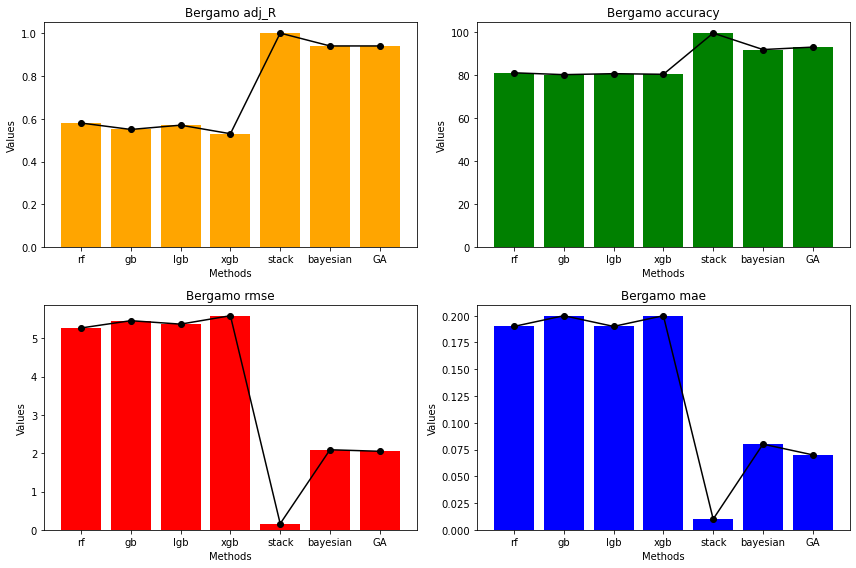

In [33]:
subset = output_eval.iloc[0:7, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

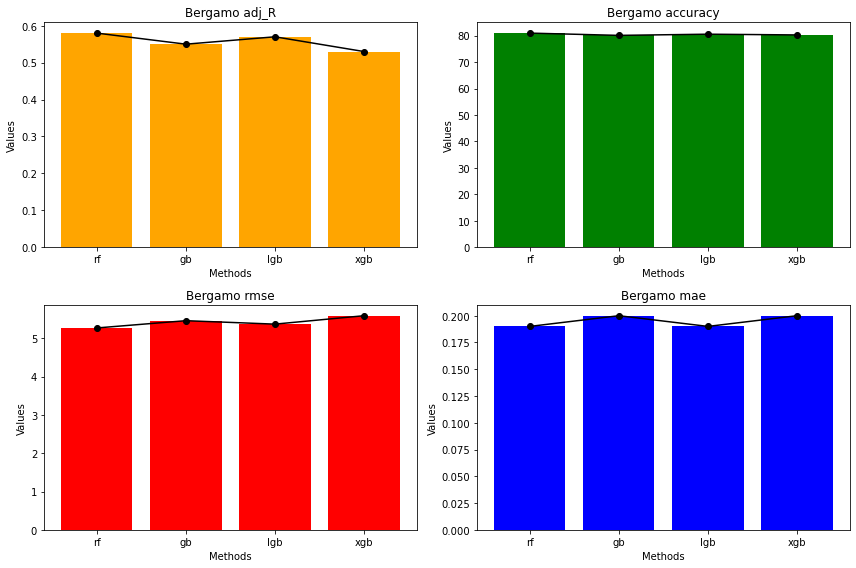

In [34]:
subset = singles.iloc[0:4, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

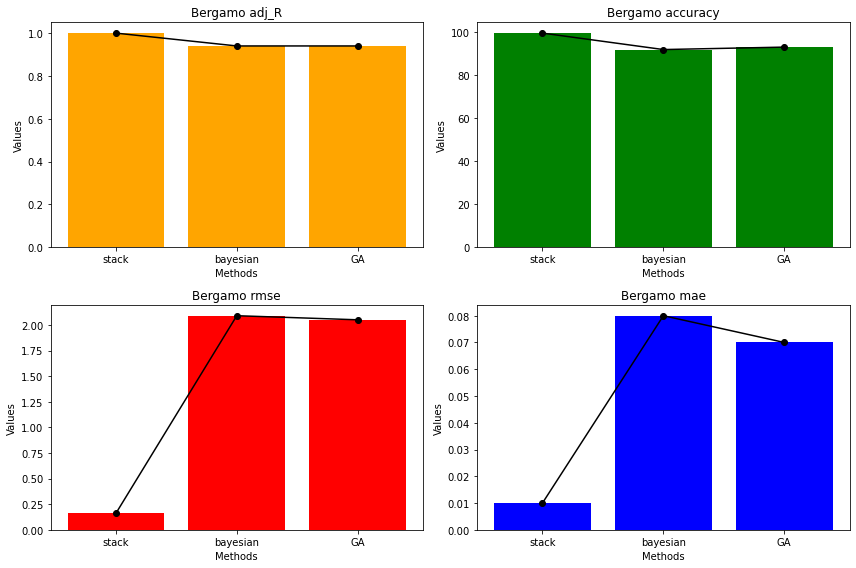

In [35]:
subset = only_mains.iloc[0:3, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

## Roma

In [37]:
city_name = 'Roma'

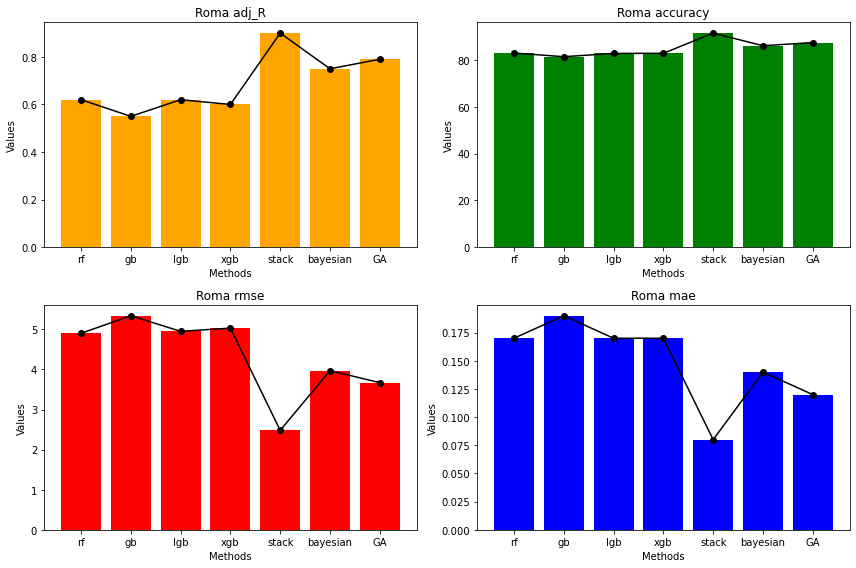

In [38]:
subset = output_eval.iloc[7:14, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']

# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

In [39]:
singles.iloc[4:8]

,Unnamed: 0,adj_R,rmse,mae,accuracy
7,roma_rf,0.62,4.90,0.17,83.06
8,roma_gb,0.55,5.34,0.19,81.48
9,roma_lgb,0.62,4.95,0.17,82.90
10,roma_xgb,0.60,5.03,0.17,82.94


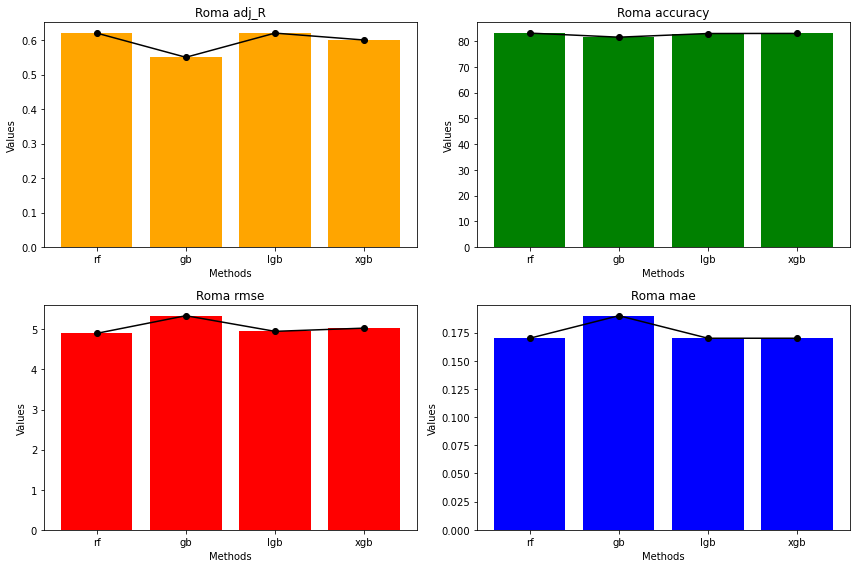

In [41]:
subset = singles.iloc[4:8, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

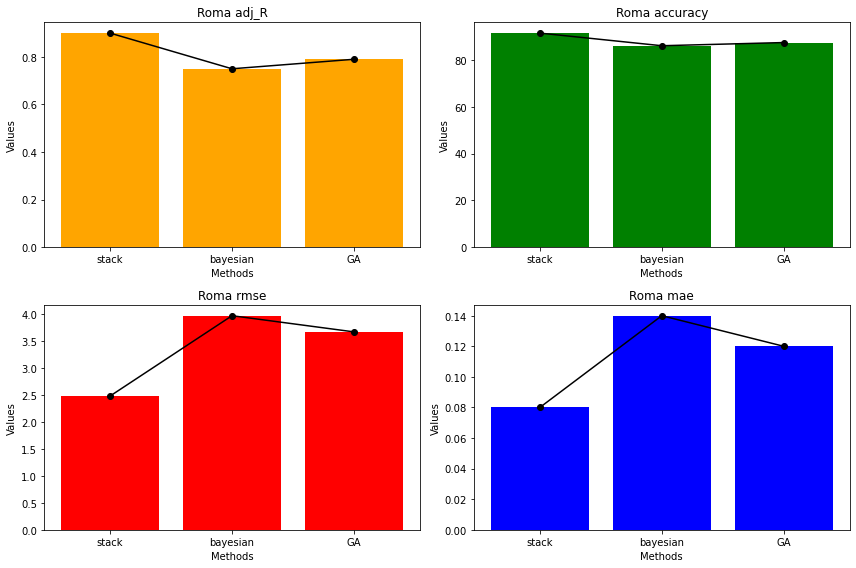

In [42]:
subset = only_mains.iloc[3:6, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Milano

In [43]:
city_name = 'Milano'

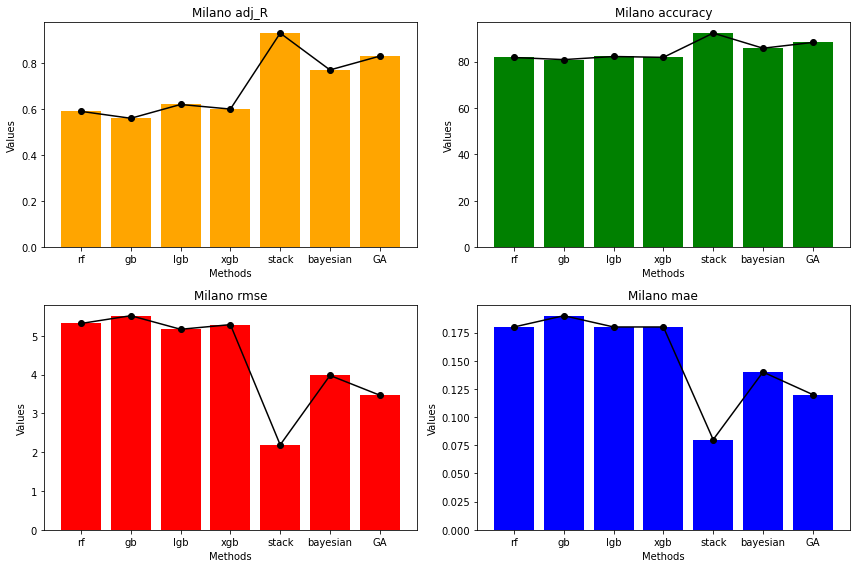

In [44]:
subset = output_eval.iloc[14:21, 1:]  
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

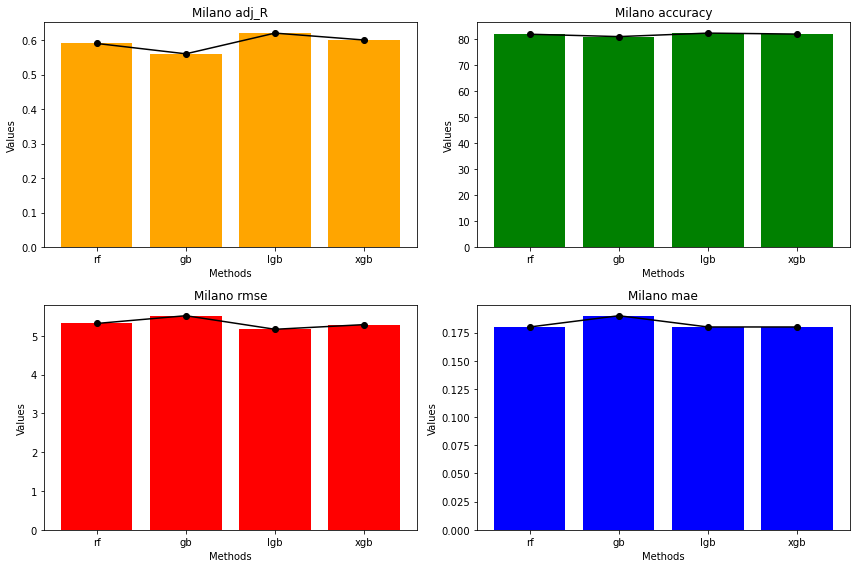

In [45]:
subset = singles.iloc[8:12, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

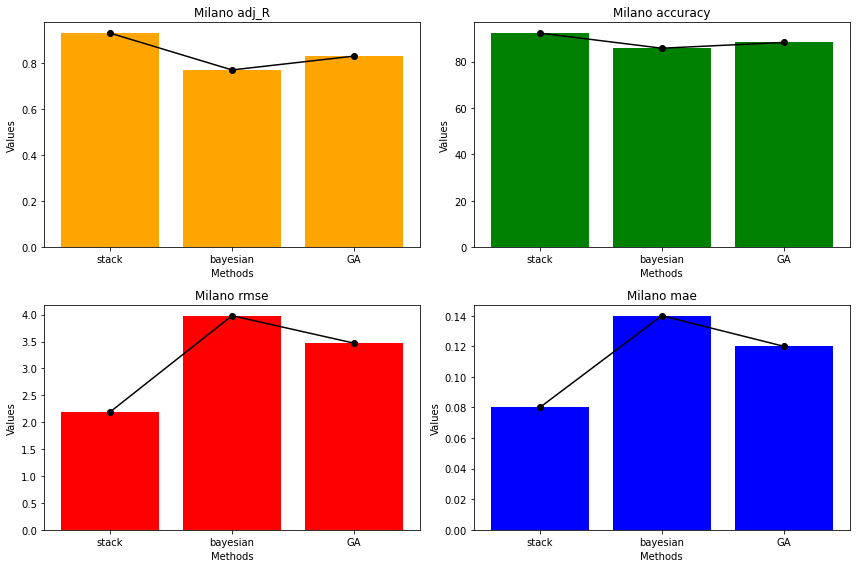

In [46]:
# subset = only_mains.iloc[6:9, 1:] 
subset = only_mains.iloc[6:9, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Sicilia

In [48]:
city_name = 'Scilia'
output_eval.iloc[21:28]

,Unnamed: 0,adj_R,rmse,mae,accuracy
21,sicilia_rf,0.63,5.54,0.21,79.23
22,sicilia_gb,0.56,5.99,0.23,77.29
23,sicilia_lgb,0.63,5.54,0.21,79.43
24,sicilia_xgb,0.63,5.49,0.20,79.75
25,sicilia_stack,0.84,3.65,0.14,86.22
26,sicilia_bayes,0.71,4.88,0.18,81.80
27,sicilia_GA,0.77,4.39,0.16,83.79


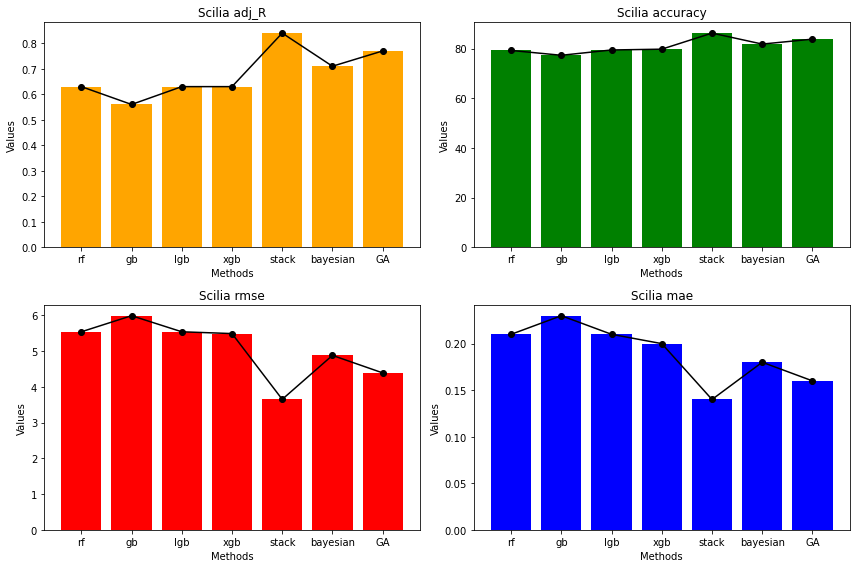

In [49]:
subset = output_eval.iloc[21:28, 1:]   
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

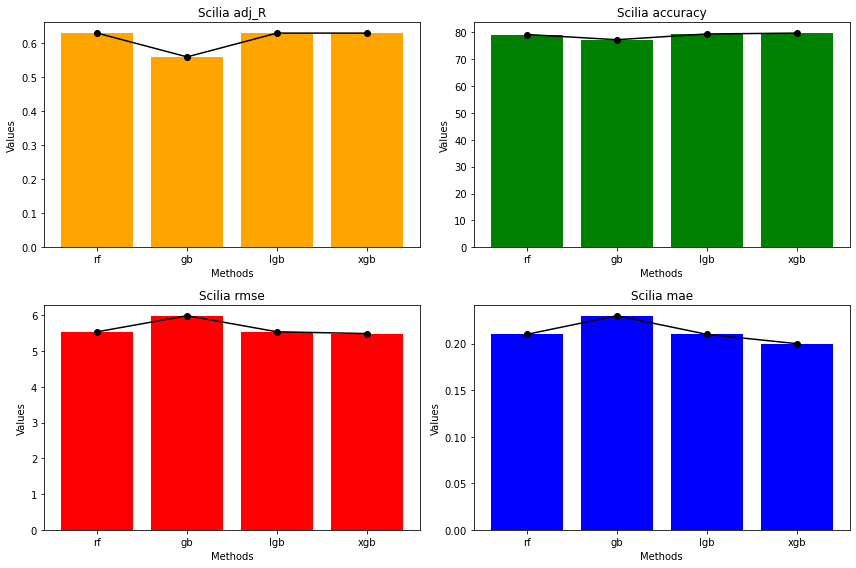

In [50]:
subset = singles.iloc[12:16, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

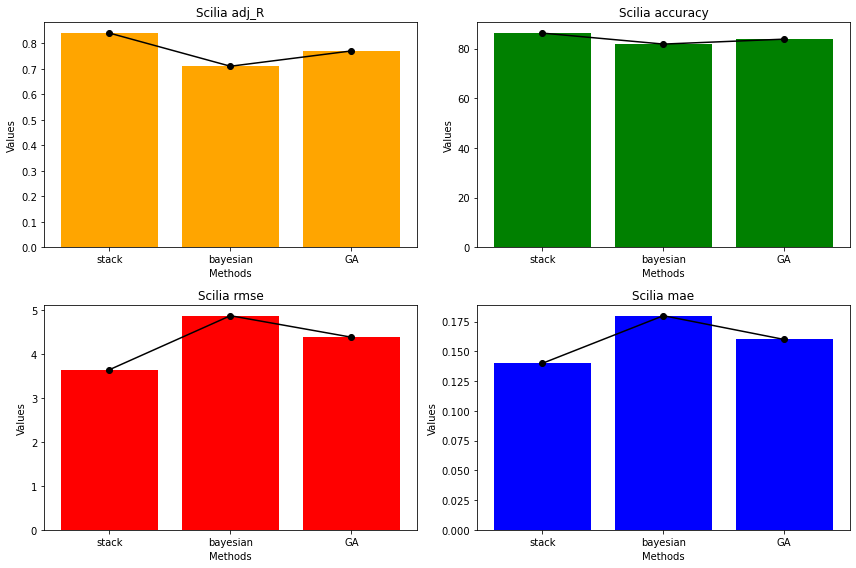

In [51]:
subset = only_mains.iloc[9:12, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Trentino

In [52]:
city_name = 'Trentino'
output_eval.iloc[28:35]

,Unnamed: 0,adj_R,rmse,mae,accuracy
28,trentino_rf,0.65,5.24,0.17,83.05
29,trentino_gb,0.60,5.64,0.19,81.11
30,trentino_lgb,0.65,5.26,0.17,82.92
31,trentino_xgb,0.63,5.39,0.18,82.40
32,trentino_stack,0.99,0.87,0.03,97.20
33,trentino_bayes,0.89,2.97,0.10,89.73
34,trentino_GA,0.95,2.02,0.06,93.76


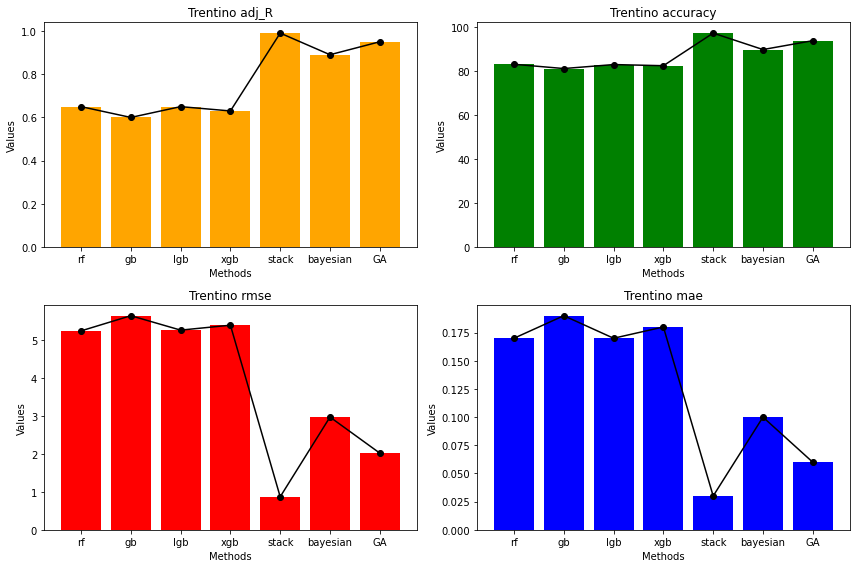

In [53]:
subset = output_eval.iloc[28:35, 1:]   
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

In [147]:
singles.iloc[16:20] 

,Unnamed: 0,adj_R,rmse,mae,accuracy
28,trentino_rf,0.65,5.24,0.17,83.05
29,trentino_gb,0.60,5.64,0.19,81.11
30,trentino_lgb,0.65,5.26,0.17,82.92
31,trentino_xgb,0.63,5.39,0.18,82.40


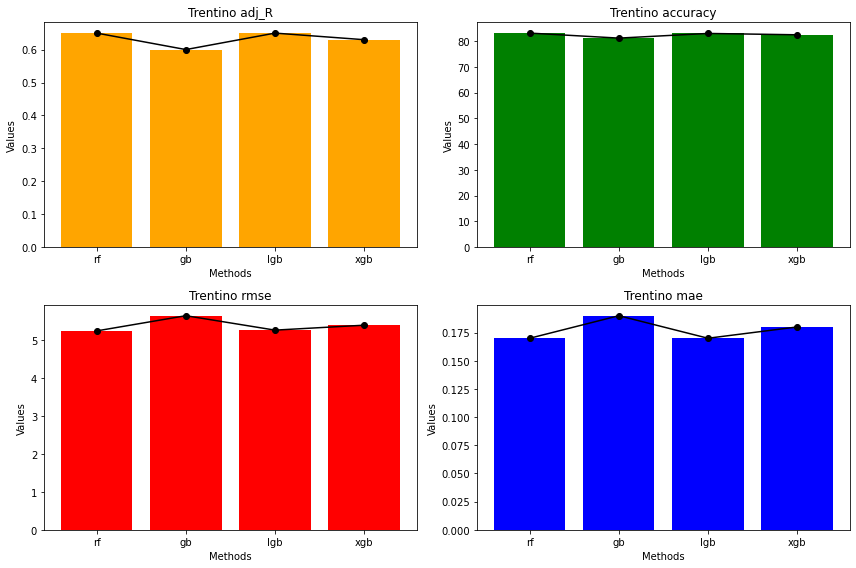

In [54]:
subset = singles.iloc[16:20, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

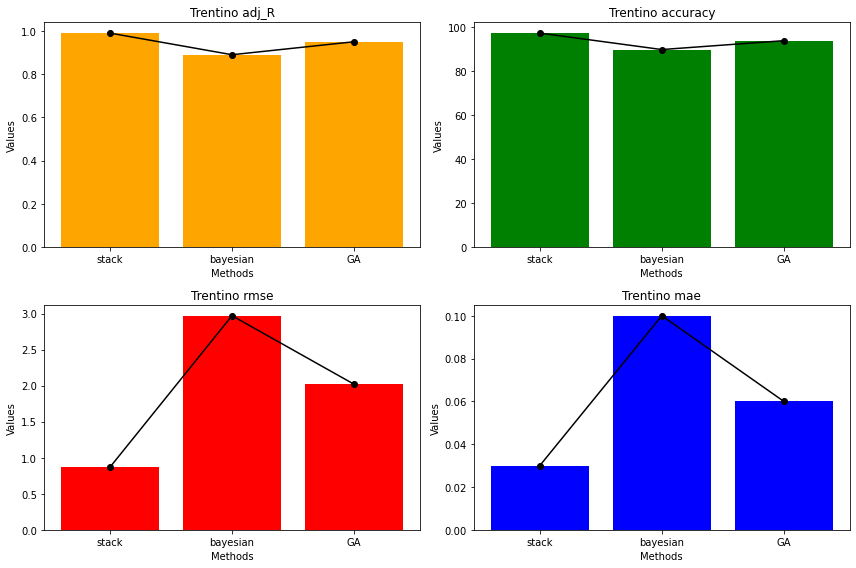

In [55]:
subset = only_mains.iloc[12:15, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Puglia

In [56]:
city_name = 'Puglia'
output_eval[35:42]

,Unnamed: 0,adj_R,rmse,mae,accuracy
35,puglia_rf,0.60,5.55,0.19,80.70
36,puglia_gb,0.53,6.03,0.21,78.58
37,puglia_lgb,0.60,5.57,0.19,80.53
38,puglia_xgb,0.61,5.52,0.19,80.78
39,puglia_stack,0.86,3.33,0.12,88.17
40,puglia_bayes,0.71,4.74,0.17,83.35
41,puglia_GA,0.74,4.47,0.15,84.54


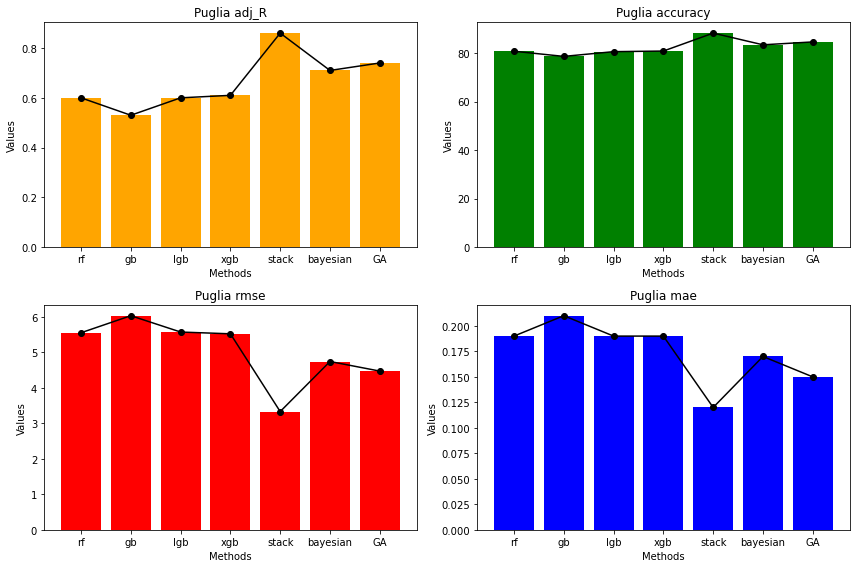

In [57]:
subset = output_eval.iloc[35:42, 1:]  
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

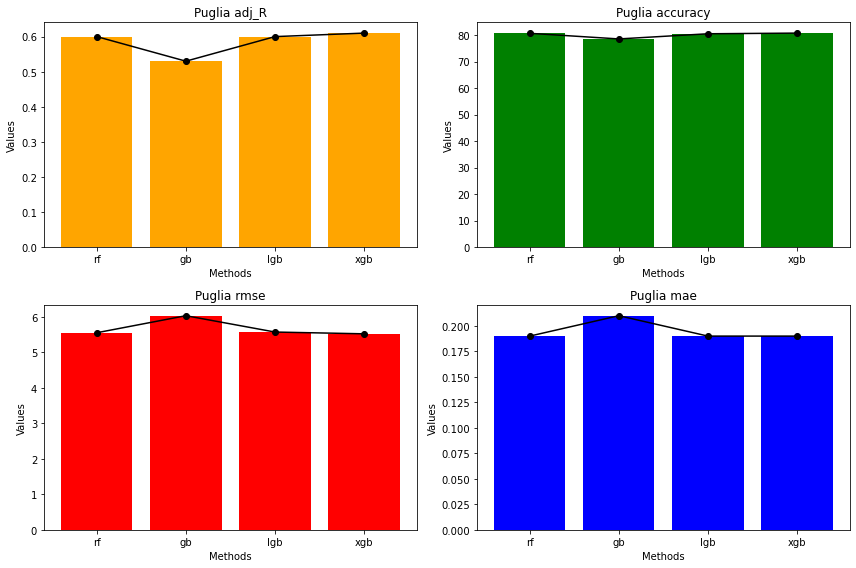

In [58]:
subset = singles.iloc[20:24, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

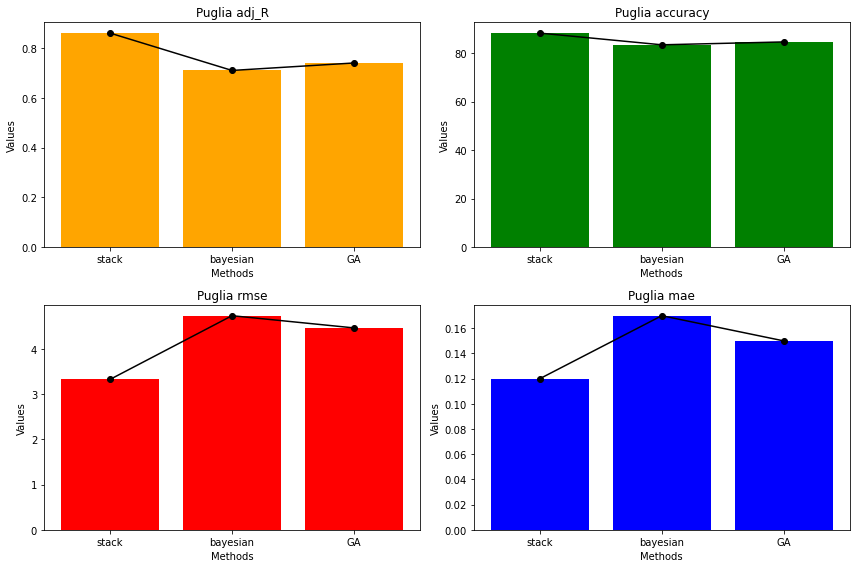

In [59]:
subset = only_mains.iloc[15:18, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Firenze

In [60]:
city_name = 'Firenze'
output_eval[42:49]

,Unnamed: 0,adj_R,rmse,mae,accuracy
42,firenze_rf,0.69,5.01,0.17,83.16
43,firenze_gb,0.65,5.34,0.19,81.49
44,firenze_lgb,0.69,4.98,0.17,83.07
45,firenze_xgb,0.67,5.15,0.17,82.55
46,firenze_stack,0.97,1.44,0.05,95.20
47,firenze_bayes,0.86,3.36,0.12,88.34
48,firenze_GA,0.89,2.96,0.10,90.12


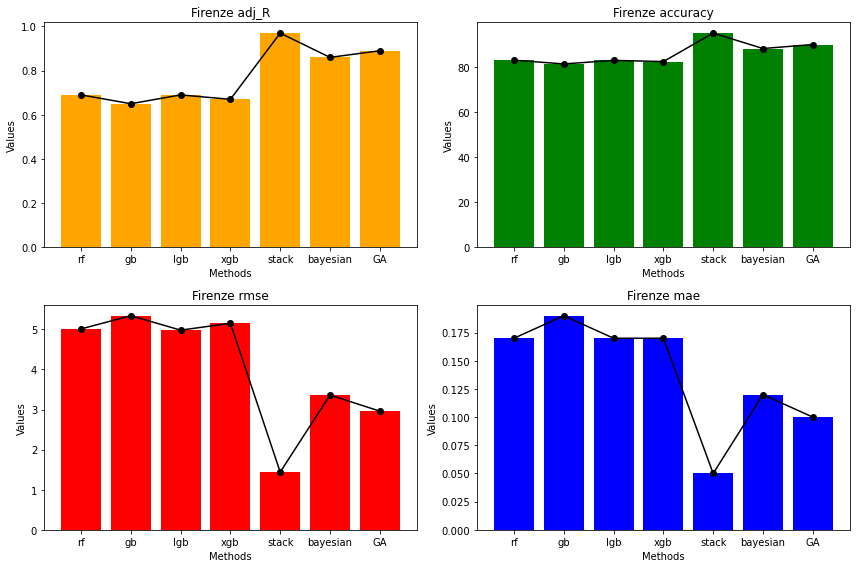

In [61]:
subset = output_eval.iloc[42:49, 1:]  
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

In [4]:
only_mains.iloc[18:21]

,Unnamed: 0,adj_R,rmse,mae,accuracy
46,firenze_stack,0.97,1.44,0.05,95.20
47,firenze_bayes,0.86,3.36,0.12,88.34
48,firenze_GA,0.89,2.96,0.10,90.12


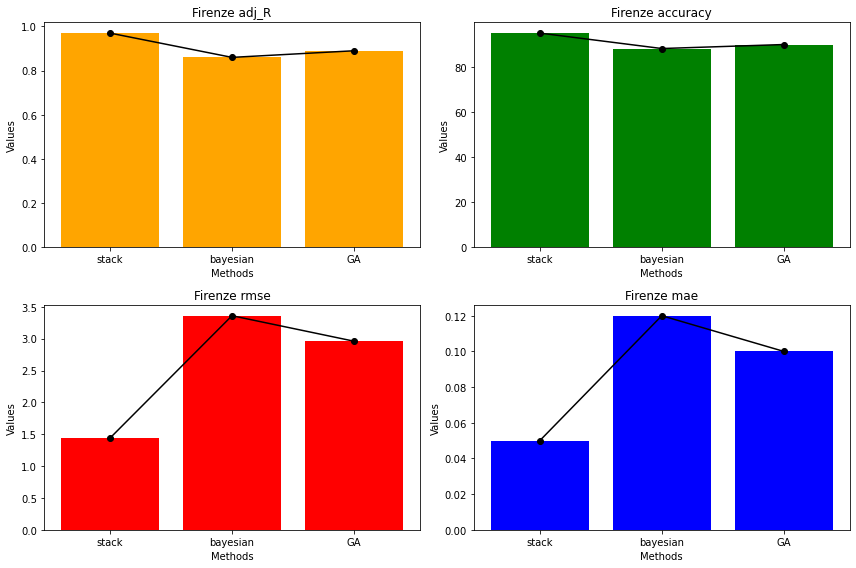

In [62]:
subset = only_mains.iloc[18:21, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Venezia

In [63]:
city_name = 'Venezia'
output_eval[49:56]

,Unnamed: 0,adj_R,rmse,mae,accuracy
49,venezia_rf,0.63,4.94,0.15,85.13
50,venezia_gb,0.60,5.15,0.16,83.99
51,venezia_lgb,0.65,4.80,0.15,85.49
52,venezia_xgb,0.65,4.81,0.14,85.85
53,venezia_stack,0.98,1.01,0.03,96.98
54,venezia_bayes,0.87,3.00,0.09,90.66
55,venezia_GA,0.91,2.39,0.07,93.03


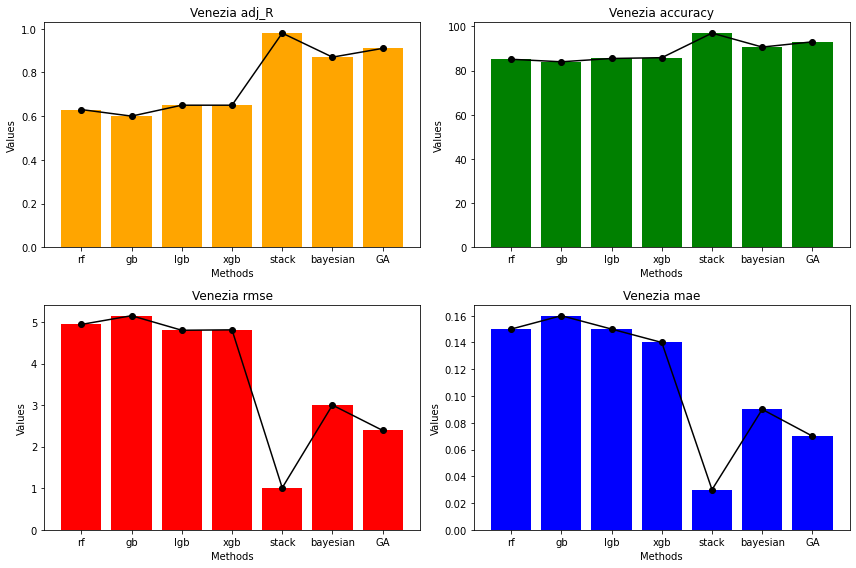

In [64]:
subset = output_eval.iloc[49:56, 1:]  
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

In [161]:
singles.iloc[28:32]

,Unnamed: 0,adj_R,rmse,mae,accuracy
49,venezia_rf,0.63,4.94,0.15,85.13
50,venezia_gb,0.60,5.15,0.16,83.99
51,venezia_lgb,0.65,4.80,0.15,85.49
52,venezia_xgb,0.65,4.81,0.14,85.85


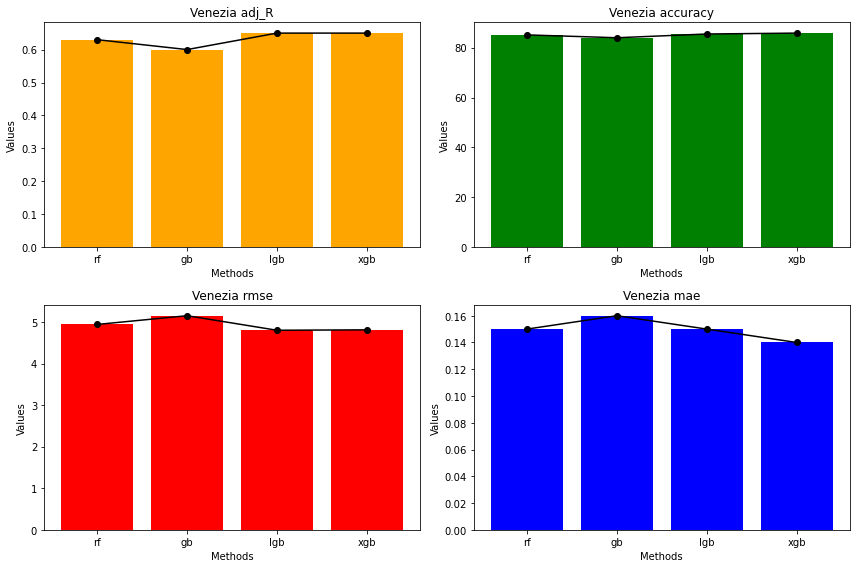

In [65]:
subset = singles.iloc[28:32, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

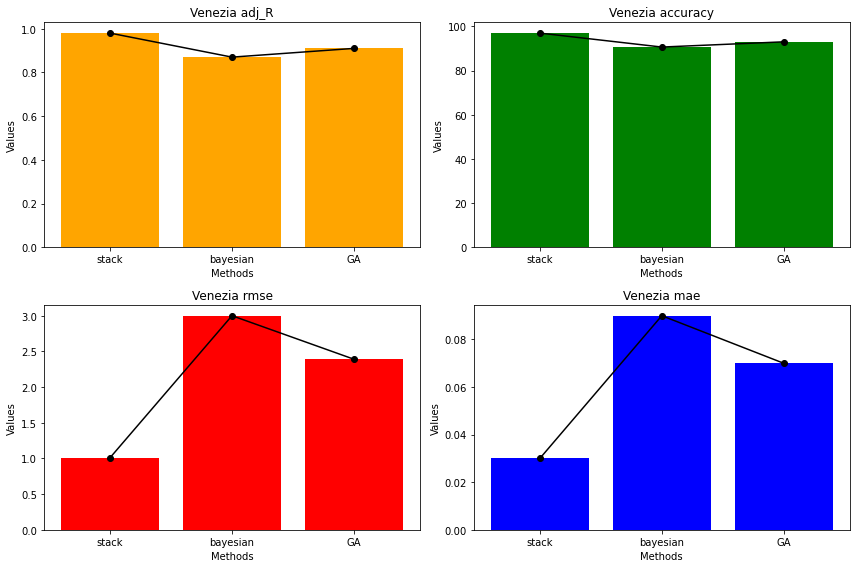

In [68]:
subset = only_mains.iloc[21:24, 1:]
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Napoli

In [69]:
city_name = 'Napoli'
output_eval[56:63]

,Unnamed: 0,adj_R,rmse,mae,accuracy
56,napoli_rf,0.50,5.61,0.20,80.03
57,napoli_gb,0.49,5.71,0.20,79.63
58,napoli_lgb,0.53,5.47,0.19,80.70
59,napoli_xgb,0.50,5.62,0.19,80.78
60,napoli_stack,0.98,1.00,0.04,96.44
61,napoli_bayes,0.83,3.34,0.12,87.79
62,napoli_GA,0.91,2.34,0.08,91.71


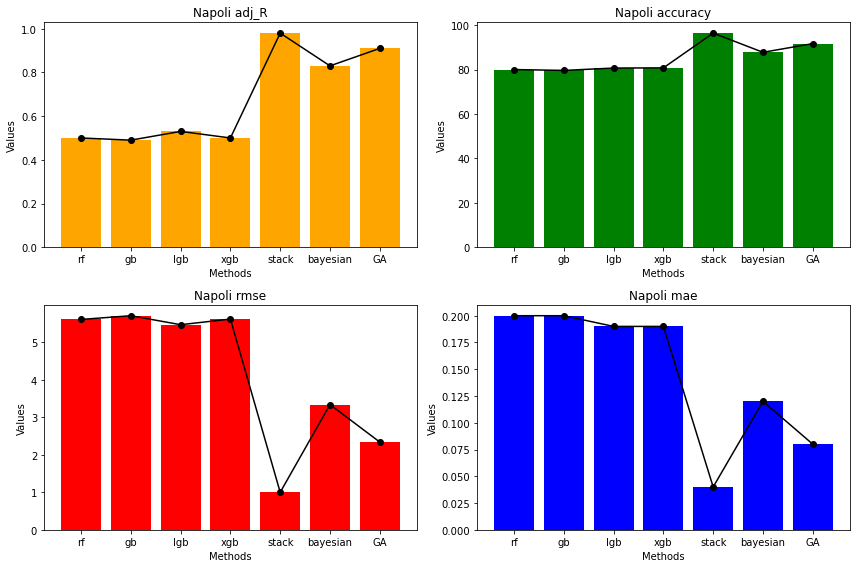

In [70]:
subset = output_eval.iloc[56:63, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

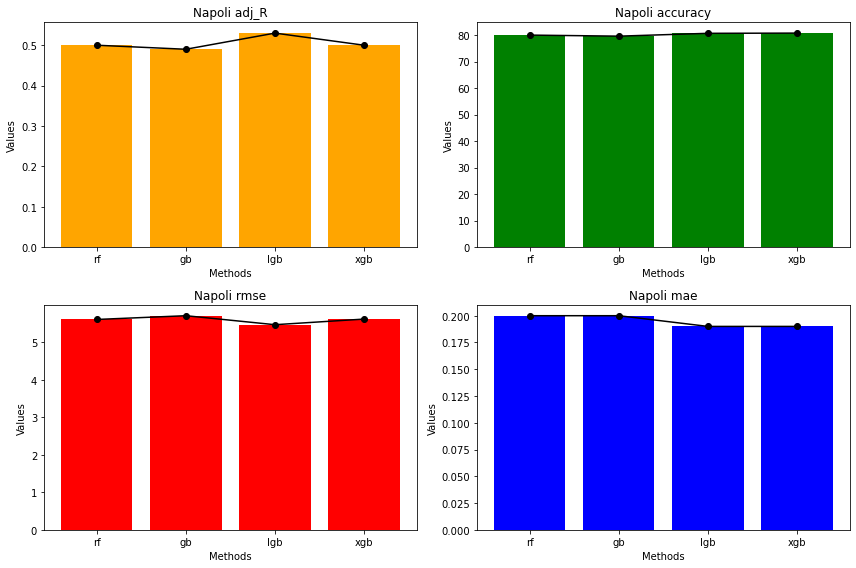

In [71]:
subset = singles.iloc[32:36, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

In [166]:
only_mains.iloc[24:27]

,Unnamed: 0,adj_R,rmse,mae,accuracy
60,napoli_stack,0.98,1.00,0.04,96.44
61,napoli_bayes,0.83,3.34,0.12,87.79
62,napoli_GA,0.91,2.34,0.08,91.71


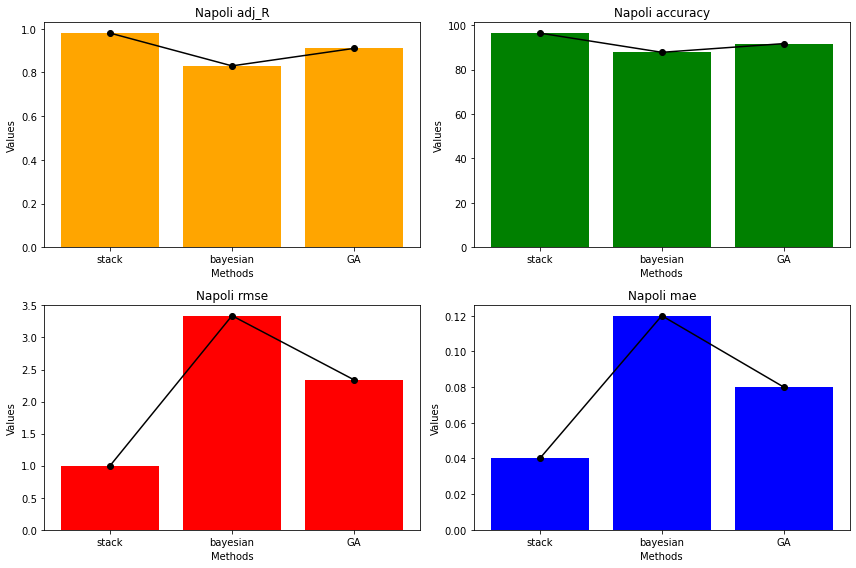

In [72]:
# subset = only_mains.iloc[6:9, 1:] 
subset = only_mains.iloc[24:27, 1:] [['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Bologna

In [73]:
city_name = 'Bologna'
output_eval[63:70]

,Unnamed: 0,adj_R,rmse,mae,accuracy
63,bologna_rf,0.50,5.51,0.18,82.30
64,bologna_gb,0.48,5.59,0.18,81.57
65,bologna_lgb,0.52,5.40,0.17,82.76
66,bologna_xgb,0.46,5.72,0.18,81.96
67,bologna_stack,1.00,0.34,0.01,98.84
68,bologna_bayes,0.92,2.27,0.08,91.73
69,bologna_GA,0.92,2.28,0.08,92.08


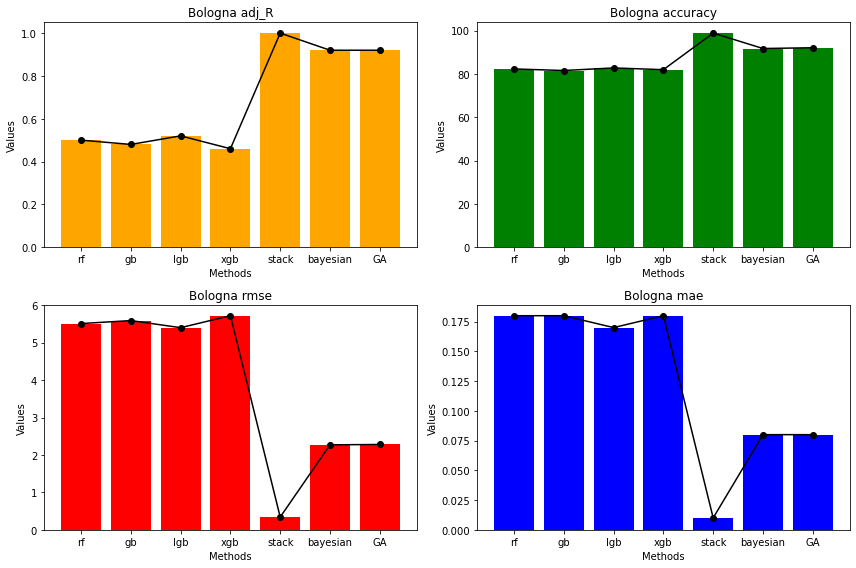

In [75]:
subset = output_eval.iloc[63:70, 1:]  
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb', 'stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

In [154]:
singles.iloc[36:40]

,Unnamed: 0,adj_R,rmse,mae,accuracy
63,bologna_rf,0.50,5.51,0.18,82.30
64,bologna_gb,0.48,5.59,0.18,81.57
65,bologna_lgb,0.52,5.40,0.17,82.76
66,bologna_xgb,0.46,5.72,0.18,81.96


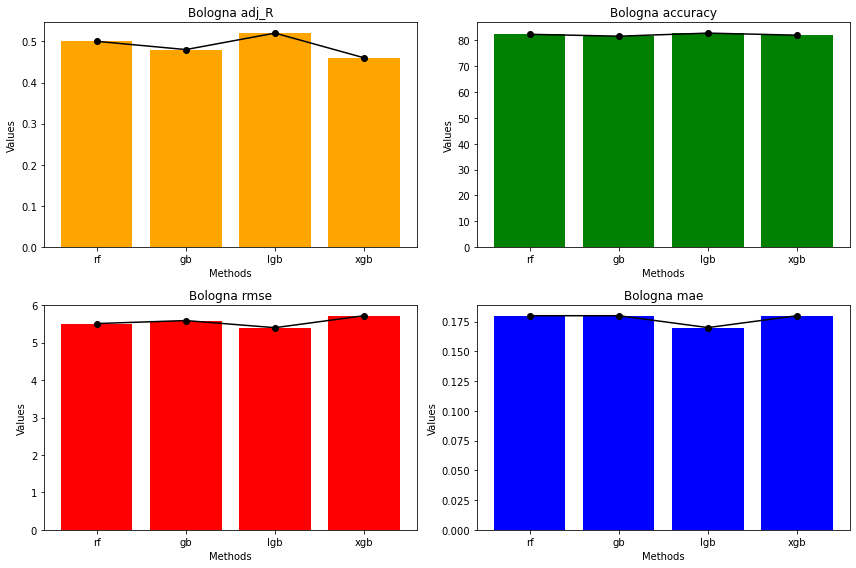

In [76]:
subset = singles.iloc[36:40, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['rf', 'gb', 'lgb', 'xgb']
create_subplot(subset, x_labels, colors, city_name)

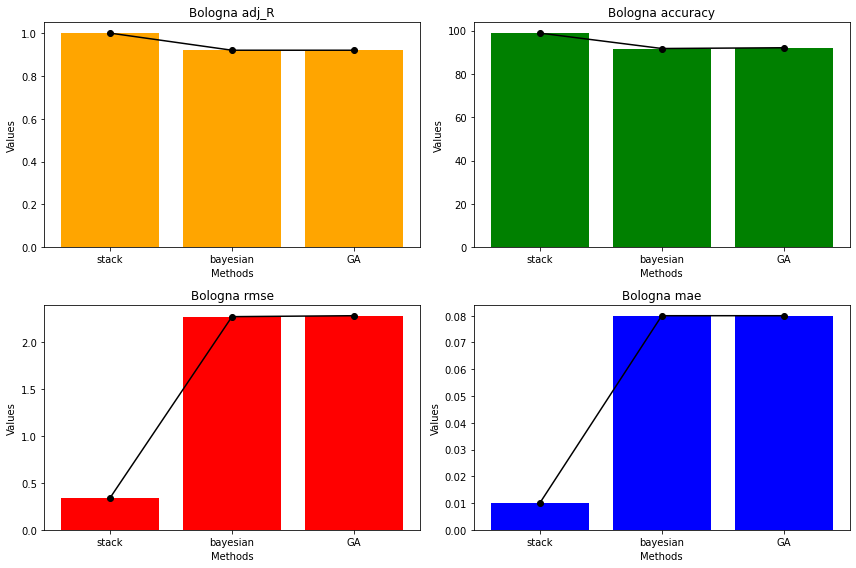

In [78]:
subset = only_mains.iloc[27:30, 1:] 
subset = subset[['adj_R', 'accuracy', 'rmse', 'mae']]
colors = ['orange', 'green', 'red', 'blue']
# x-axis
x_labels = ['stack', 'bayesian', 'GA']
create_subplot(subset, x_labels, colors, city_name)

### Total Comparison

In [18]:
df_volatile = output_eval
num_splits = 10
split_size = 7

dfs = []

for i in range(0, len(df_volatile), split_size):
    subset = df_volatile.iloc[i:i+split_size]
    dfs.append(subset)

# for idx, df in enumerate(dfs):
#     print(f"DataFrame {idx+1}:\n{df}\n")

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\oh

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\oh

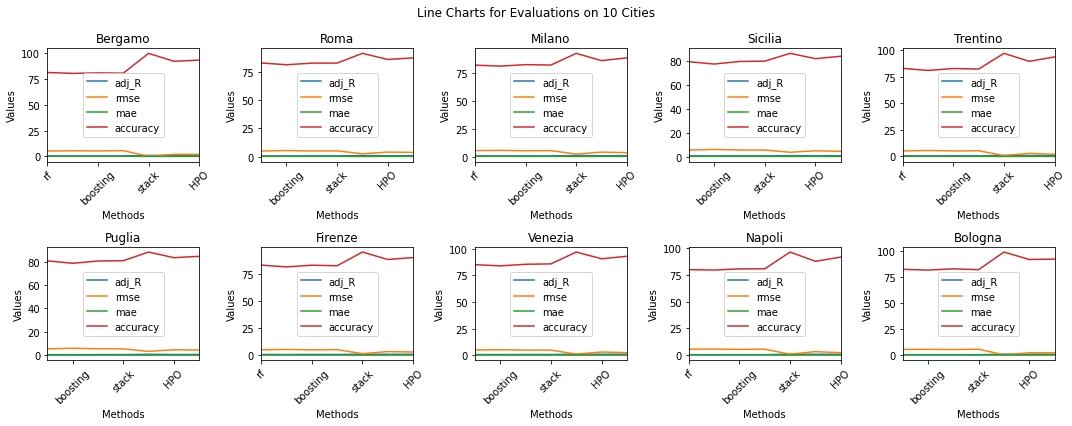

In [19]:
city_names = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']
method_names = ['rf', 'boosting', 'stack', 'HPO']

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Line Charts for Evaluations on 10 Cities')

for idx, df in enumerate(dfs):
    row = idx // 5
    col = idx % 5
    
    subset_plot = df[['adj_R', 'rmse', 'mae', 'accuracy']]
    subset_plot.plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(f'{city_names[idx].capitalize()}')
    axes[row, col].set_xlabel('Methods')
    axes[row, col].set_ylabel('Values')
    axes[row, col].set_xticklabels(method_names, rotation=45) 
    axes[row, col].legend(loc='center')

plt.tight_layout()
plt.show()

In [22]:
df_volatile = only_mains.iloc[0:, 0:4]

num_splits = 10
split_size = 3

dfs = []

for i in range(0, len(df_volatile), split_size):
    subset = df_volatile.iloc[i:i+split_size]
    dfs.append(subset)

# for idx, df in enumerate(dfs):
#     print(f"DataFrame {idx+1}:\n{df}\n")

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\oh

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\oh

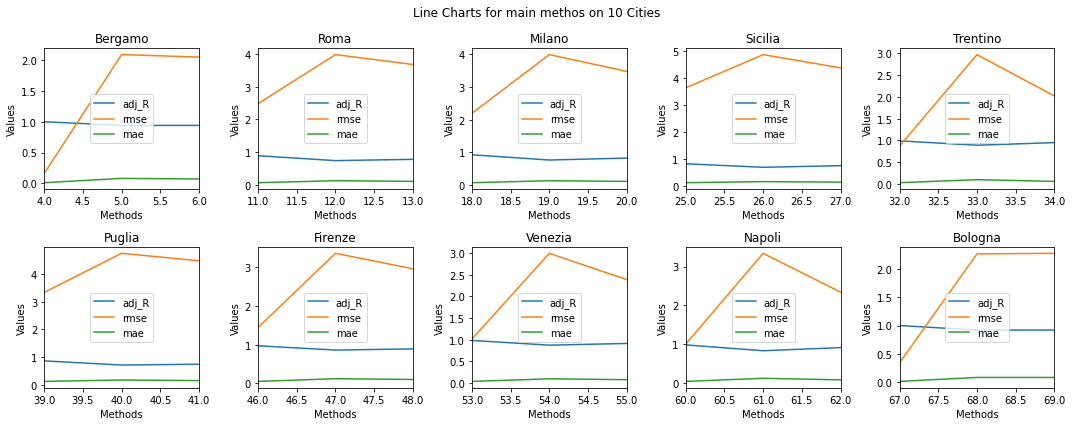

In [23]:
city_names = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']
method_names = ['stack', 'bayesian', 'GA']

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Line Charts for main methos on 10 Cities')

for idx, df in enumerate(dfs):
    row = idx // 5
    col = idx % 5
    
    subset_plot = df[['adj_R', 'rmse', 'mae']]
    subset_plot.plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(f'{city_names[idx].capitalize()}')
    axes[row, col].set_xlabel('Methods')
    axes[row, col].set_ylabel('Values')
#     axes[row, col].set_xticklabels(method_names, rotation=45) 
    axes[row, col].legend(loc='center')

plt.tight_layout()
plt.show()

In [20]:
# df_volatile = singles.iloc[0:, 0:5]

# num_splits = 10
# split_size = 4

# dfs = []

# for i in range(0, len(df_volatile), split_size):
#     subset = df_volatile.iloc[i:i+split_size]
#     dfs.append(subset)

# for idx, df in enumerate(dfs):
#     print(f"DataFrame {idx+1}:\n{df}\n")

In [21]:
# city_names = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']
# method_names = ['rf', 'gb', 'lgb', 'xgb']

# fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# fig.suptitle('Line Charts for main methos on 10 Cities')

# for idx, df in enumerate(dfs):
#     row = idx // 5
#     col = idx % 5
    
#     subset_plot = df[['adj_R', 'rmse', 'mae']]
#     subset_plot.plot(kind='line', ax=axes[row, col])
#     axes[row, col].set_title(f'{city_names[idx].capitalize()}')
#     axes[row, col].set_xlabel('Methods')
#     axes[row, col].set_ylabel('Values')
# #     axes[row, col].set_xticklabels(method_names, rotation=45) 
#     axes[row, col].legend(loc='center')

# plt.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator


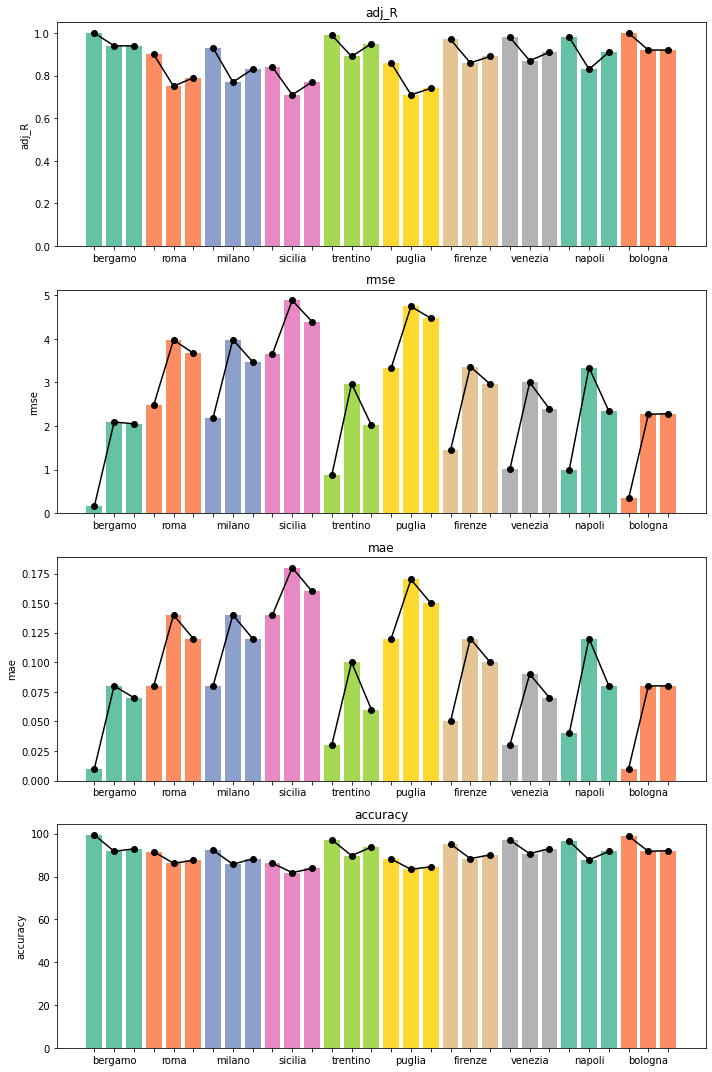

In [131]:
# Methods: 'stack', 'bayes', 'GA'
df = only_mains

cities = ['bergamo', 'roma', 'milano', 'sicilia', 'trentino', 'puglia', 'firenze', 'venezia', 'napoli', 'bologna']
methods = ['stack', 'bayes', 'GA']
metrics = ['adj_R', 'rmse', 'mae', 'accuracy']

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    for city in cities:
        city_data = df[df['Unnamed: 0'].str.contains(city)]
        x_values = [f"{city}_{method}" for method in methods]
        y_values = city_data[metric].values
        ax.bar(x_values, y_values, label=city)
        
        # Line 그래프 추가 (every 3 bars)
        for i in range(0, len(x_values), 3):
            ax.plot(x_values[i:i+3], y_values[i:i+3], marker='o', color='black')  # 검정색으로 설정
    
    
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels(['','bergamo','', '','roma','', '','milano','', '','sicilia','', '','trentino','', '','puglia','', '','firenze','', '','venezia','', '','napoli','', '','bologna'])  # 막대마다 쓰여지는 글씨를 없앰

plt.tight_layout()
plt.show()

## best params from best models

In [293]:
# Data Import
best_params = pd.read_csv('best_params.csv')
best_params

,Method,bergamo,roma,milano,sicilia,trentino,puglia,firenze,venezia,napoli,bologna
0,rf,"RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random...","RandomForestRegressor(n_estimators=190, random..."
1,gb,"GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra...","GradientBoostingRegressor(n_estimators=190, ra..."
2,lgb,"LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)","LGBMRegressor(n_estimators=190, random_state=123)"
3,xgb,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."
4,stack,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."
5,bayes,"OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('...","OrderedDict([('gamma', 0.7703399241440627), ('..."
6,GA,"XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',...","XGBRegressor(base_score=0.5, booster='gbtree',..."


In [306]:
print(best_params.loc[6, 'bergamo'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.07173330604877207,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.3661267728814921, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [310]:
print(best_params.loc[5, 'bergamo'])

OrderedDict([('gamma', 0.7703399241440627), ('learning_rate', 0.19204784774815406), ('max_depth', 2), ('n_estimators', 764)])


In [309]:
# Same based on XGBRegressor()
print(best_params.loc[4, 'bergamo'])
print(best_params.loc[3, 'bergamo'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=190, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=190, n_jobs=8, num_parallel_tree=1, random_state

In [308]:
# Same based on default settings
print(best_params.loc[2, 'bergamo'])
print(best_params.loc[1, 'bergamo'])
print(best_params.loc[0, 'bergamo'])

LGBMRegressor(n_estimators=190, random_state=123)
GradientBoostingRegressor(n_estimators=190, random_state=123)
RandomForestRegressor(n_estimators=190, random_state=123)
